In [ ]:
import pandas as pd
import nltk
import numpy as np
import re

#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize, sent_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir('/content/gdrive/My Drive/Deep Learning/Code')

import pandas as pd
import numpy as np
df_pickle = pd.read_pickle('Final_processed.pkl')

Mounted at /content/gdrive


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_pixel  1338 non-null   object
 1   high_sale    1338 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.0+ KB


In [ ]:
df=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
index_list = [0, 4, 10, 22, 24, 37, 43, 50, 52, 53, 62, 77, 78, 85, 96, 97, 100, 111, 116, 134, 146, 148, 159, 165, 172, 176, 177, 188, 191, 197, 208, 210, 213, 232, 244, 246, 249, 251, 252, 255, 288, 291, 292, 298, 302, 305, 306, 310, 318, 324, 327, 329, 331, 341, 347, 350, 362, 375, 387, 388, 393, 397, 398, 411, 438, 439, 456, 467, 479, 484, 494, 495, 518, 519, 523, 538, 540, 548, 549, 550, 557, 558, 574, 590, 614, 615, 625, 635, 636, 637, 644, 647, 652, 659, 666, 673, 687, 689, 696, 699, 703, 709, 716, 739, 743, 750, 755, 757, 763, 783, 785, 789, 801, 816, 817, 826, 829, 836, 840, 844, 858, 868, 871, 884, 891, 892, 894, 902, 906, 913, 916, 923, 935, 937, 938, 945, 950, 953, 958, 970, 977, 979, 980, 982, 986, 991, 993, 995, 1003, 1008, 1017, 1026, 1044, 1065, 1069, 1073, 1078, 1083, 1086, 1096, 1108, 1115, 1124, 1129, 1130, 1138, 1143, 1152, 1182, 1186, 1209, 1228, 1230, 1248, 1250, 1261, 1271, 1276, 1279, 1283, 1294, 1311, 1312, 1323, 1326, 1328, 1330, 1343, 1352, 1353, 1361, 1362, 1366, 1368, 1371, 1374, 1380, 1384, 1386, 1390, 1395, 1403, 1417, 1419, 1422, 1428, 1429, 1435, 1437, 1441, 1444, 1456, 1460, 1464, 1471, 1472, 1474, 1477, 1480, 1488, 1491, 1494, 1495, 1516, 1523, 1537, 1541, 1542, 1558, 1559, 1560, 1564, 1568, 1569, 1570]
df = df.drop(index_list)

# Reset the index after dropping rows
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1338 non-null   object 
 1   title_orig                    1338 non-null   object 
 2   price                         1338 non-null   float64
 3   retail_price                  1338 non-null   int64  
 4   currency_buyer                1338 non-null   object 
 5   units_sold                    1338 non-null   int64  
 6   uses_ad_boosts                1338 non-null   int64  
 7   rating                        1338 non-null   float64
 8   rating_count                  1338 non-null   int64  
 9   rating_five_count             1297 non-null   float64
 10  rating_four_count             1297 non-null   float64
 11  rating_three_count            1297 non-null   float64
 12  rating_two_count              1297 non-null   float64
 13  rat

In [ ]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
1,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
2,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
3,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,...,65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08
4,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,3172.0,...,10194,4.076516,5652f4053a698c76dc9a3f37,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5c63a337d5e2ce4bbb3152cf,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,summer,2020-08


In [ ]:
# Concatenate the DataFrames horizontally
df = pd.concat([df, df_pickle], axis=1)

In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1338 non-null   object 
 1   title_orig                    1338 non-null   object 
 2   price                         1338 non-null   float64
 3   retail_price                  1338 non-null   int64  
 4   currency_buyer                1338 non-null   object 
 5   units_sold                    1338 non-null   int64  
 6   uses_ad_boosts                1338 non-null   int64  
 7   rating                        1338 non-null   float64
 8   rating_count                  1338 non-null   int64  
 9   rating_five_count             1297 non-null   float64
 10  rating_four_count             1297 non-null   float64
 11  rating_three_count            1297 non-null   float64
 12  rating_two_count              1297 non-null   float64
 13  rat

<ipython-input-12-8025e9c6e938>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='high_sale', palette=['blue', 'orange'])


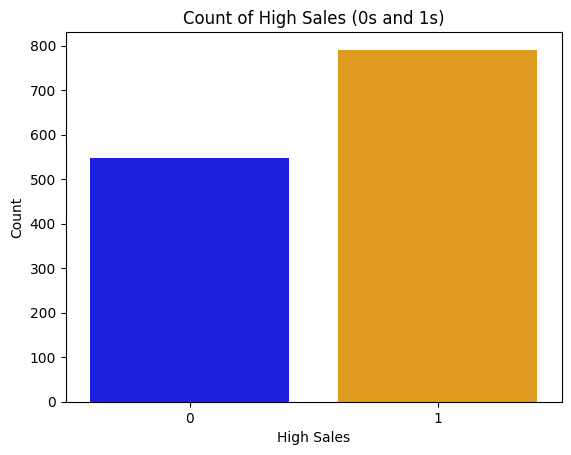

In [ ]:
# Plotting with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='high_sale', palette=['blue', 'orange'])
plt.xlabel('High Sales')
plt.ylabel('Count')
plt.title('Count of High Sales (0s and 1s)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import resample

def balance_dataset(df, image_column='image_pixel'):
    # Separate image data and other features
    X_images = np.stack(df[image_column].values)
    y = df['high_sale'].values

    # Balance images using augmentation
    X_images_balanced, y_balanced = augment_minority(X_images, y)

    # Create temporary dataframe without image column
    df_temp = df.drop(columns=[image_column])

    # Separate majority and minority classes for other features
    df_majority = df_temp[df_temp['high_sale'] == 1]
    df_minority = df_temp[df_temp['high_sale'] == 0]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

    # Combine majority and upsampled minority
    df_numeric_balanced = pd.concat([df_majority, df_minority_upsampled])

    # Create new balanced DataFrame
    df_final = df_numeric_balanced.copy()

    # Add balanced image data
    df_final[image_column] = [img for img in X_images_balanced]

    # Shuffle the dataset
    df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

    return df_final

def augment_minority(X, y):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Find minority class
    minority_class = 0 if np.sum(y == 0) < np.sum(y == 1) else 1
    majority_class = 1 - minority_class

    # Get minority samples
    X_minority = X[y == minority_class]
    y_minority = y[y == minority_class]

    # Calculate samples needed
    n_minority = len(X_minority)
    n_majority = np.sum(y == majority_class)
    n_to_generate = n_majority - n_minority

    # Generate augmented images
    X_augmented = []
    for i in range(n_to_generate):
        idx = i % n_minority
        img = X_minority[idx:idx+1]
        augmented = next(datagen.flow(img, batch_size=1))[0]
        X_augmented.append(augmented)

    # Combine original and augmented data
    X_balanced = np.concatenate([X, np.array(X_augmented)])
    y_balanced = np.concatenate([y, np.full(n_to_generate, minority_class)])

    return X_balanced, y_balanced

print("Original dataset shape:", df['high_sale'].value_counts())

# Balance the dataset
df_balanced = balance_dataset(df)

print("\nBalanced dataset shape:", df_balanced['high_sale'].value_counts())

# Verify image shapes
print("\nImage shapes in balanced dataset:")
print("First image shape:", np.stack(df_balanced['image_pixel'].iloc[0]).shape)

Original dataset shape: high_sale
1    791
0    547
Name: count, dtype: int64

Balanced dataset shape: high_sale
0    791
1    791
Name: count, dtype: int64

Image shapes in balanced dataset:
First image shape: (224, 224, 3)


In [ ]:
df_balanced = balance_dataset(df, image_column='image_pixel')

# Verify the balance
print("Class distribution:", df_balanced['high_sale'].value_counts())

# Access balanced data
X_images = np.stack(df_balanced['image_pixel'].values)
X_numeric = df_balanced.drop(columns=['image_pixel', 'high_sale']).values
y = df_balanced['high_sale'].values

Class distribution: high_sale
0    791
1    791
Name: count, dtype: int64


<ipython-input-15-3d03cad673d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='high_sale', palette=['blue', 'orange'])


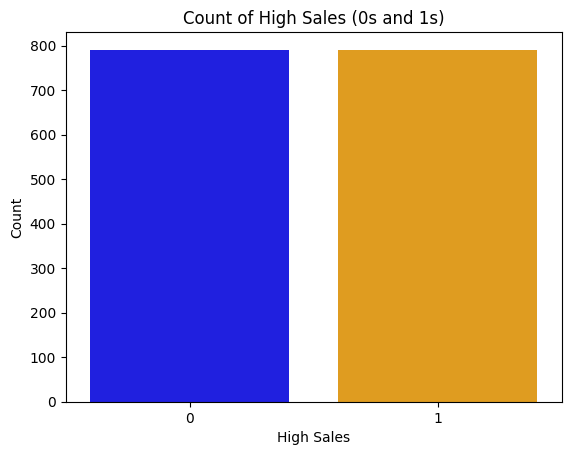

In [ ]:
# Plotting with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_balanced, x='high_sale', palette=['blue', 'orange'])
plt.xlabel('High Sales')
plt.ylabel('Count')
plt.title('Count of High Sales (0s and 1s)')
plt.show()

In [ ]:
df_balanced.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,high_sale,image_pixel
0,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.0,51,EUR,10,0,5.00,0,NaN,...,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08,0,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."
1,Shorts d'été pour femmes à lacets taille élast...,Women Summer Shorts Lace Up Elastic Waistband ...,2.0,2,EUR,100,1,2.92,12,2.0,...,5b47ffa01e5bc91f3eea4f1f,0,NaN,https://www.wish.com/c/5ecc8472fe429946b009900e,https://contestimg.wish.com/api/webimage/5ecc8...,5ecc8472fe429946b009900e,summer,2020-08,0,"[[[251.0, 245.0, 247.0], [251.0, 245.0, 247.0]..."
2,Women's Sexy Push Up Bikini Sexy Vintage Set S...,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.0,30,EUR,10,0,5.00,0,NaN,...,56025ed8293a5b2d24779bde,0,NaN,https://www.wish.com/c/573db9316b335c34ca0513b8,https://contestimg.wish.com/api/webimage/573db...,573db9316b335c34ca0513b8,summer,2020-08,0,"[[[220.0, 222.0, 209.0], [220.0, 222.0, 209.0]..."
3,"New Summer Fashion Women Sleeveless "" HIPPIE S...",New Summer Fashion Women Sleeveless “ HIPPIE S...,6.0,33,EUR,5000,0,4.04,846,451.0,...,5784d339e8aa8938977fefd0,0,NaN,https://www.wish.com/c/5c3ff9c71b115c0802243181,https://contestimg.wish.com/api/webimage/5c3ff...,5c3ff9c71b115c0802243181,summer,2020-08,1,"[[[176.0, 176.0, 168.0], [176.0, 176.0, 168.0]..."
4,Été Casual Sexy Halter Vest Femmes Sac BuckleT...,Summer Casual Sexy Halter Vest Women Bag Buckl...,7.0,6,EUR,1000,0,4.16,129,72.0,...,590d6c356815062709f1b06c,0,NaN,https://www.wish.com/c/5cd68836e731f919b55e08e3,https://contestimg.wish.com/api/webimage/5cd68...,5cd68836e731f919b55e08e3,summer,2020-08,1,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]..."


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1582 non-null   object 
 1   title_orig                    1582 non-null   object 
 2   price                         1582 non-null   float64
 3   retail_price                  1582 non-null   int64  
 4   currency_buyer                1582 non-null   object 
 5   units_sold                    1582 non-null   int64  
 6   uses_ad_boosts                1582 non-null   int64  
 7   rating                        1582 non-null   float64
 8   rating_count                  1582 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
# product color
def main_color(s):
    main_color = {"red":"red", "white":"white", "pink":"pink", "yellow":"yellow", "green":"green", "blue":"blue", "wine":"red", "burgundy":"red", "black":"black", "navy":"navy", "orange":"orange",
    "rose":"pink", "gray":"gray", "grey":"gray", "purple":"purple", "violet":"purple", "army":"green", "leopard":"orange", "ivory":"white",
    "brown":"brown", "coffee":"brown", "camel":"beige", "tan":"brown", "nude":"beige", "khaki":"khaki", "apricot":"yellow", "camouflage":"green", "jasper":"red"}  # ordered by importance
    for key, value in main_color.items():
        if key in s:
            return value
    return "others"
product_color = df_balanced["product_color"]
product_color = [x.lower() if type(x) is str else 'nan' for x in product_color]
product_color = [main_color(color) for color in product_color]
from matplotlib import colors
rgb = []
for s in product_color:
  if s != "others":
    rgb.append(np.array(colors.to_rgb(s)))
rgb = np.array(rgb)
avg_rgb = np.average(rgb, axis=0)
product_colors = [avg_rgb if s == "others" else np.array(colors.to_rgb(s)) for s in product_color]
df_balanced['product_color_rgb'] = product_colors

# log prices
df_balanced['log_price'] = [np.log(p) for p in df_balanced["price"]]
df_balanced['log_retail_price'] = [np.log(p) for p in df_balanced["retail_price"]]

# log merchant rating count
df_balanced['log_merchant_rating_count'] = np.log(df_balanced['merchant_rating_count'])

# urgent text
df_balanced['urgent'] = [1 if s == "Quantité limitée !" else 0 for s in df_balanced["urgency_text"]]
df_balanced["discount_ratio"] = [df_balanced["price"][i]/df_balanced["retail_price"][i] for i in range(len(df_balanced["price"]))]

df_balanced.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,theme,crawl_month,high_sale,image_pixel,product_color_rgb,log_price,log_retail_price,log_merchant_rating_count,urgent,discount_ratio
0,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.0,51,EUR,10,0,5.00,0,NaN,...,summer,2020-08,0,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...","[0.0, 0.0, 0.0]",1.609438,3.931826,5.686975,0,0.098039
1,Shorts d'été pour femmes à lacets taille élast...,Women Summer Shorts Lace Up Elastic Waistband ...,2.0,2,EUR,100,1,2.92,12,2.0,...,summer,2020-08,0,"[[[251.0, 245.0, 247.0], [251.0, 245.0, 247.0]...","[0.0, 0.0, 1.0]",0.693147,0.693147,5.902633,1,1.000000
2,Women's Sexy Push Up Bikini Sexy Vintage Set S...,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.0,30,EUR,10,0,5.00,0,NaN,...,summer,2020-08,0,"[[[220.0, 222.0, 209.0], [220.0, 222.0, 209.0]...","[0.5158676339168373, 0.4195973295484407, 0.408...",2.397895,3.401197,10.026634,1,0.366667
3,"New Summer Fashion Women Sleeveless "" HIPPIE S...",New Summer Fashion Women Sleeveless “ HIPPIE S...,6.0,33,EUR,5000,0,4.04,846,451.0,...,summer,2020-08,1,"[[[176.0, 176.0, 168.0], [176.0, 176.0, 168.0]...","[1.0, 0.7529411764705882, 0.796078431372549]",1.791759,3.496508,9.975110,0,0.181818
4,Été Casual Sexy Halter Vest Femmes Sac BuckleT...,Summer Casual Sexy Halter Vest Women Bag Buckl...,7.0,6,EUR,1000,0,4.16,129,72.0,...,summer,2020-08,1,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...","[0.0, 0.0, 0.0]",1.945910,1.791759,6.846943,1,1.166667


In [ ]:
rgb = df_balanced["product_color_rgb"]
rgb = np.stack(rgb.values, axis=0)
for i in range(3):
    df_balanced["product_color_rgb"+str(i)] = rgb[:,i]
df_balanced.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,image_pixel,product_color_rgb,log_price,log_retail_price,log_merchant_rating_count,urgent,discount_ratio,product_color_rgb0,product_color_rgb1,product_color_rgb2
0,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.0,51,EUR,10,0,5.00,0,NaN,...,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...","[0.0, 0.0, 0.0]",1.609438,3.931826,5.686975,0,0.098039,0.000000,0.000000,0.000000
1,Shorts d'été pour femmes à lacets taille élast...,Women Summer Shorts Lace Up Elastic Waistband ...,2.0,2,EUR,100,1,2.92,12,2.0,...,"[[[251.0, 245.0, 247.0], [251.0, 245.0, 247.0]...","[0.0, 0.0, 1.0]",0.693147,0.693147,5.902633,1,1.000000,0.000000,0.000000,1.000000
2,Women's Sexy Push Up Bikini Sexy Vintage Set S...,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.0,30,EUR,10,0,5.00,0,NaN,...,"[[[220.0, 222.0, 209.0], [220.0, 222.0, 209.0]...","[0.5158676339168373, 0.4195973295484407, 0.408...",2.397895,3.401197,10.026634,1,0.366667,0.515868,0.419597,0.408847
3,"New Summer Fashion Women Sleeveless "" HIPPIE S...",New Summer Fashion Women Sleeveless “ HIPPIE S...,6.0,33,EUR,5000,0,4.04,846,451.0,...,"[[[176.0, 176.0, 168.0], [176.0, 176.0, 168.0]...","[1.0, 0.7529411764705882, 0.796078431372549]",1.791759,3.496508,9.975110,0,0.181818,1.000000,0.752941,0.796078
4,Été Casual Sexy Halter Vest Femmes Sac BuckleT...,Summer Casual Sexy Halter Vest Women Bag Buckl...,7.0,6,EUR,1000,0,4.16,129,72.0,...,"[[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...","[0.0, 0.0, 0.0]",1.945910,1.791759,6.846943,1,1.166667,0.000000,0.000000,0.000000


In [ ]:
def process_sentence(sentence):
    new_tokens = word_tokenize(sentence)
    new_tokens = [token.lower() for token in new_tokens]
    new_tokens =[token for token in new_tokens if token not in stopwords.words('english')]
    new_tokens = [token for token in new_tokens if token.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(token) for token in new_tokens]
    return "".join(new_tokens)

In [ ]:
titles = df_balanced['title_orig'].tolist()
tokens = [process_sentence(t) for t in titles]
df_balanced['title_preprocessed'] = tokens
df_balanced.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,product_color_rgb,log_price,log_retail_price,log_merchant_rating_count,urgent,discount_ratio,product_color_rgb0,product_color_rgb1,product_color_rgb2,title_preprocessed
0,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.0,51,EUR,10,0,5.00,0,NaN,...,"[0.0, 0.0, 0.0]",1.609438,3.931826,5.686975,0,0.098039,0.000000,0.000000,0.000000,womenssummerfashionlipprintsetladycasualroundn...
1,Shorts d'été pour femmes à lacets taille élast...,Women Summer Shorts Lace Up Elastic Waistband ...,2.0,2,EUR,100,1,2.92,12,2.0,...,"[0.0, 0.0, 1.0]",0.693147,0.693147,5.902633,1,1.000000,0.000000,0.000000,1.000000,womansummershortlaceelasticwaistbandloosepanty...
2,Women's Sexy Push Up Bikini Sexy Vintage Set S...,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.0,30,EUR,10,0,5.00,0,NaN,...,"[0.5158676339168373, 0.4195973295484407, 0.408...",2.397895,3.401197,10.026634,1,0.366667,0.515868,0.419597,0.408847,womansexypushbikinivintagesetsexybrazilianbiquini
3,"New Summer Fashion Women Sleeveless "" HIPPIE S...",New Summer Fashion Women Sleeveless “ HIPPIE S...,6.0,33,EUR,5000,0,4.04,846,451.0,...,"[1.0, 0.7529411764705882, 0.796078431372549]",1.791759,3.496508,9.975110,0,0.181818,1.000000,0.752941,0.796078,newsummerfashionwomansleevelesshippiesoullette...
4,Été Casual Sexy Halter Vest Femmes Sac BuckleT...,Summer Casual Sexy Halter Vest Women Bag Buckl...,7.0,6,EUR,1000,0,4.16,129,72.0,...,"[0.0, 0.0, 0.0]",1.945910,1.791759,6.846943,1,1.166667,0.000000,0.000000,0.000000,summercasualsexyhaltervestwomanbagbuckletankto...


In [ ]:
from transformers import BertTokenizer, TFBertModel
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', from_pt=True)
bert_model = TFBertModel.from_pretrained('bert-base-uncased', from_pt=True)

def encode_texts(texts, max_length=128):
    inputs = tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors="tf"
    )
    return inputs

def get_bert_embeddings(encoded_inputs):
    outputs = bert_model(encoded_inputs['input_ids'],
                        attention_mask=encoded_inputs['attention_mask'])
    return outputs.last_hidden_state[:, 0, :]

def process_in_batches(df, batch_size=32):
    """Process text data in batches to avoid memory issues"""
    all_embeddings = []

    # Calculate number of batches
    n_samples = len(df_balanced)
    n_batches = (n_samples + batch_size - 1) // batch_size

    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, n_samples)

        # Get batch of texts
        batch_texts = df_balanced['title_preprocessed'].iloc[start_idx:end_idx]

        # Process batch
        batch_encodings = encode_texts(batch_texts)
        batch_embeddings = get_bert_embeddings(batch_encodings)

        # Convert to numpy and store
        all_embeddings.append(batch_embeddings.numpy())

        # Optional: Print progress
        print(f"Processed batch {i+1}/{n_batches}", end='\r')

    # Combine all batches
    final_embeddings = np.vstack(all_embeddings)
    print("\nProcessing complete!")
    return final_embeddings

# Process data in batches
bert_embeddings_np = process_in_batches(df_balanced, batch_size=32)

print("BERT embeddings shape:", bert_embeddings_np.shape)

# Add embeddings as features
for i in range(bert_embeddings_np.shape[1]):
    df_balanced[f'bert_feature_{i}'] = bert_embeddings_np[:, i]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already


Processing complete!
BERT embeddings shape: (1582, 768)


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Columns: 823 entries, title to bert_feature_767
dtypes: float32(768), float64(16), int64(17), object(22)
memory usage: 5.3+ MB


In [ ]:
X = df_balanced[["log_price", "log_retail_price", "uses_ad_boosts", "badges_count", "badge_local_product","badge_product_quality", "badge_fast_shipping", "urgent", "discount_ratio",
                    "product_color_rgb0", "product_color_rgb1", "product_color_rgb2", "shipping_option_price", "shipping_is_express", "countries_shipped_to", "inventory_total", "image_pixel"]]
y = df_balanced['high_sale']

In [ ]:
# Loop over column names and assign them to X
for i in range(768):  # Since there are 768 BERT features
    X[f'bert_feature_{i}'] = df_balanced[f'bert_feature_{i}']

In [ ]:
X.shape

(1582, 785)

In [ ]:
y.shape

(1582,)

In [ ]:
def create_combined_model(input_shape_image, input_shape_bert, input_shape_numeric):
    # Input layers
    image_input = Input(shape=input_shape_image, name='image_input')
    bert_input = Input(shape=(input_shape_bert,), name='bert_input')
    numeric_input = Input(shape=(input_shape_numeric,), name='numeric_input')

    # Image processing branch - increased capacity
    base_model = EfficientNetB5(weights='imagenet',
                               include_top=False,
                               input_shape=input_shape_image)

    # Freeze fewer layers (70%) to allow more learning
    for layer in base_model.layers[:int(0.7 * len(base_model.layers))]:
        layer.trainable = False

    image_x = base_model(image_input)
    image_x = GlobalAveragePooling2D()(image_x)
    image_x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(image_x)
    image_x = BatchNormalization()(image_x)
    image_x = Dropout(0.3)(image_x)

    # BERT features processing - deeper network
    bert_x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(bert_input)
    bert_x = BatchNormalization()(bert_x)
    bert_x = Dropout(0.3)(bert_x)

    bert_x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(bert_x)
    bert_x = BatchNormalization()(bert_x)
    bert_x = Dropout(0.2)(bert_x)

    # Numeric features processing - enhanced
    numeric_x = BatchNormalization()(numeric_input)
    numeric_x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(numeric_x)
    numeric_x = BatchNormalization()(numeric_x)
    numeric_x = Dropout(0.2)(numeric_x)

    # Combine features with attention mechanism
    combined = Concatenate()([image_x, bert_x, numeric_x])

    # Deeper fusion layers
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[image_input, bert_input, numeric_input], outputs=output)

    optimizer = Adam(learning_rate=1e-4)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from keras import Input
# Prepare data
numeric_features = ['log_price', 'log_retail_price', 'uses_ad_boosts', 'badges_count',
                   'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
                   'urgent', 'discount_ratio', 'product_color_rgb0', 'product_color_rgb1',
                   'product_color_rgb2', 'shipping_option_price', 'shipping_is_express',
                   'countries_shipped_to', 'inventory_total']
bert_features = [f'bert_feature_{i}' for i in range(768)]

# Prepare all data types
X_numeric = df_balanced[numeric_features].values
X_bert = df_balanced[bert_features].values
X_image = np.stack(df_balanced['image_pixel'].values)
y = df_balanced['high_sale'].values

# Normalize image data
X_image = X_image / 255.0

# Split data maintaining alignment
X_image_train, X_image_test, X_bert_train, X_bert_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_image, X_bert, X_numeric, y, test_size=0.125, random_state=42
)

X_image_train, X_image_val, X_bert_train, X_bert_val, X_numeric_train, X_numeric_val, y_train, y_val = train_test_split(
    X_image_train, X_bert_train, X_numeric_train, y_train, test_size=0.14286, random_state=42
)

# Create and train model
input_shape_image = X_image.shape[1:]
model = create_combined_model(
    input_shape_image=input_shape_image,
    input_shape_bert=768,
    input_shape_numeric=len(numeric_features)
)

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        min_delta=0.001
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Training with modified parameters
history = model.fit(
    [X_image_train, X_bert_train, X_numeric_train],
    y_train,
    validation_data=([X_image_val, X_bert_val, X_numeric_val], y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.5226 - loss: 3.2951 - val_accuracy: 0.4848 - val_loss: 3.0997 - learning_rate: 1.0000e-04
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - accuracy: 0.5682 - loss: 3.1799 - val_accuracy: 0.4899 - val_loss: 3.0771 - learning_rate: 1.0000e-04
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - accuracy: 0.5708 - loss: 3.1252 - val_accuracy: 0.4848 - val_loss: 3.0356 - learning_rate: 1.0000e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.5834 - loss: 3.0828 - val_accuracy: 0.4949 - val_loss: 3.0075 - learning_rate: 1.0000e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.5613 - loss: 3.0858 - val_accuracy: 0.5404 - val_loss: 2.9677 - learning_rate: 1.0000e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.5852 - loss: 3.0370 - val_accuracy: 0.5859 - val_loss: 2.9258 - learning_rate: 1.0000e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step - accur

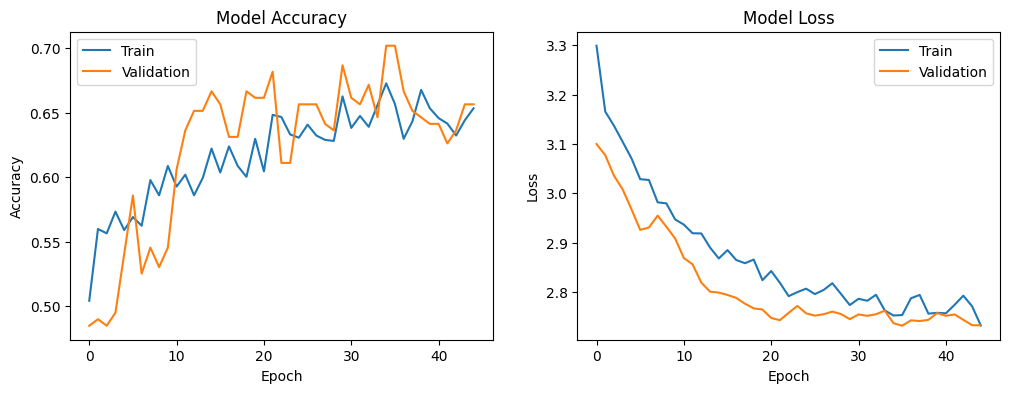

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict on the test data
y_pred_prob = model.predict([X_image_test, X_bert_test, X_numeric_test])

# Convert probabilities to binary predictions (threshold 0.5 for sigmoid activation)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step
Accuracy on test data: 0.70
